#**Import the Required Libraries**

In [4]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [3]:
from IPython.display import Image
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image 

In [6]:
det_model = YOLO('yolov8n.pt')

inst_model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:04<00:00, 1.56MB/s]


In [2]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KrtwIHS9er9uOpzbK2kF")
project = rf.workspace("peter-kobena").project("road-defect-nxmfw")
version = project.version(1)
dataset = version.download("yolov5")

Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Defect--1 in yolov5pytorch:: 100%|██████████| 412/412 [00:01<00:00, 298.58it/s]


In [11]:
img = "C:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\Road-Defect--1\\train\\images\\images17_jpg.rf.7f0664d8c441850af1d285567306332a.jpg"
detection_results = det_model.predict(img)
instance_results = inst_model.predict(img)


image 1/1 C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\train\images\images17_jpg.rf.7f0664d8c441850af1d285567306332a.jpg: 640x640 1 person, 1 dining table, 1734.7ms
Speed: 8.0ms preprocess, 1734.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\train\images\images17_jpg.rf.7f0664d8c441850af1d285567306332a.jpg: 640x640 79 persons, 4 benchs, 1 cat, 5 dogs, 4 horses, 5 cows, 7 elephants, 1 zebra, 1 umbrella, 1 snowboard, 13 bottles, 2 bowls, 1 apple, 2 oranges, 10 chairs, 10 couchs, 2 dining tables, 836.4ms
Speed: 7.0ms preprocess, 836.4ms inference, 1445.2ms postprocess per image at shape (1, 3, 640, 640)


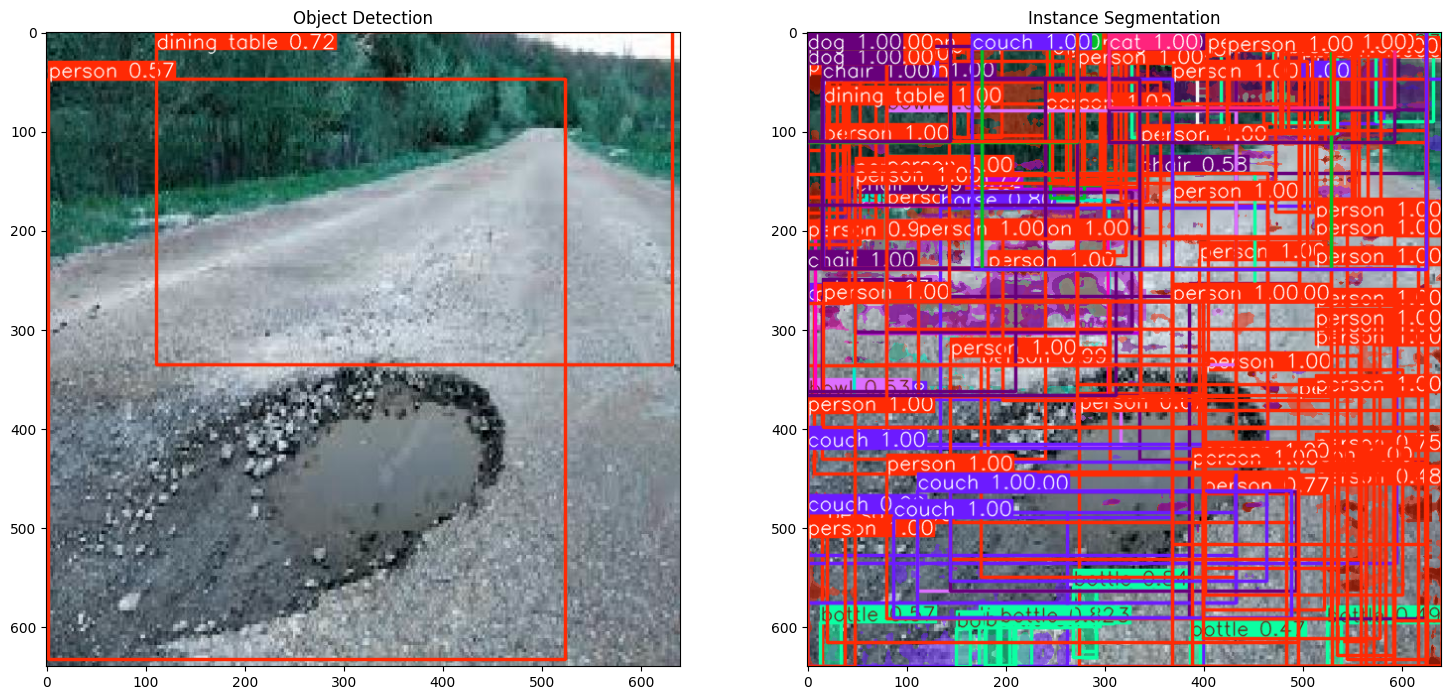

In [12]:
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

In [20]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')

In [21]:
#Define a project --> Destination directory for all results
project = "results"
#Define subdirectory for this specific training
name = "120_epochs-"

In [22]:
# Train the model
results = model.train(data='C:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\Road-Defect--1\\data.yaml',
                      project=project,
                      name=name,
                      epochs=120,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.2.68  Python-3.11.5 torch-2.4.0+cpu CPU (Intel Core(TM) i5-7200U 2.50GHz)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\data.yaml, epochs=120, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=results, name=120_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\train\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]
val: Scanning C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to results\120_epochs-\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 800 train, 800 val
Using 0 dataloader workers
Logging results to results\120_epochs-
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/120         0G        nan        nan        nan        nan         59        800: 100%|██████████| 37/37 [09:52<00:00, 16.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:53<00:00, 10.66s/it]

                   all         38        363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/120         0G        nan        nan        nan        nan         45        800: 100%|██████████| 37/37 [42:46<00:00, 69.37s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.71s/it]

                   all         38        363          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/120         0G        nan        nan        nan        nan         22        800:  81%|████████  | 30/37 [07:45<01:48, 15.46s/it]

#**Clone the Github Repo**

##Install all the Dependencies

In [2]:
%cd /content/Pothole-defect-detection/YOLOv8_Road_defect/ultralytics/yolo/v8/segment

[WinError 3] The system cannot find the path specified: '/content/Pothole-defect-detection/YOLOv8_Road_defect/ultralytics/yolo/v8/segment'
c:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection


In [3]:
%pwd

'c:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection'

##Importing the Dataset from the RoboFlow

In [18]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KrtwIHS9er9uOpzbK2kF")
project = rf.workspace("peter-kobena").project("road-defect-nxmfw")
version = project.version(1)
dataset = version.download("yolov5")

Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...


#**Training the Custom Model**

In [40]:
HOME = r"YOLOv8_Road_defect\ultralytics\yolo\v8\segment"

In [3]:
{dataset.location}

{'c:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\Road-Defect--1'}

In [7]:
import os

# Define the model and data paths
model_path = 'yolov8l-seg.pt'
dataset_location = 'c:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\Road-Defect--1'  # Update this with the correct path
data_path = os.path.join(dataset_location, 'data.yaml')



In [8]:
from ultralytics import YOLO

# Load the model
model = YOLO(model_path, task='segment')


In [10]:
# Train the model with the task explicitly defined
model.train(data=data_path, epochs=120, imgsz=640, task='segment')


Ultralytics YOLOv8.2.68  Python-3.11.5 torch-2.4.0+cpu CPU (Intel Core(TM) i5-7200U 2.50GHz)
engine\trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=c:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\train\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]
val: Scanning C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\Road-Defect--1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/10 [02:00<?, ?it/s]


KeyboardInterrupt: 

In [38]:
%cd {HOME}


[WinError 3] The system cannot find the path specified: 'YOLOv8_Road_defect\\ultralytics\\yolo\\v8\\segment'
c:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\YOLOv8_Road_defect\ultralytics\yolo\v8\segment


In [9]:
!python train.py model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=120 imgsz=640


python: can't open file 'c:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\train.py': [Errno 2] No such file or directory


In [2]:
from ultralytics import YOLO
import cv2

# Define the model and data paths
model_path = 'C:/Users/kobby/Downloads/YOLOv8_Segmentation_DeepSORT_Object_Tracking-main/Pothole-defect-detection/yolov8l-seg.pt'
video_path = 'C:/Users/kobby/Downloads/YOLOv8_Segmentation_DeepSORT_Object_Tracking-main/Pothole-defect-detection/YOLOv8_Road_defect/ultralytics/yolo/v8/segment/koforidua_road.mp4'

# Load the model
model = YOLO(model_path)

# Open the video file
video_capture = cv2.VideoCapture(video_path)
if not video_capture.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Create a VideoWriter object to save the output
output_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output video
fps = video_capture.get(cv2.CAP_PROP_FPS)
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
out_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = video_capture.read()
    if not ret:
        print("No more frames to read or error.")
        break

    # Run the model on the current frame
    results = model(frame)

    # Check if results is a list and handle each result
    if isinstance(results, list):
        for result in results:
            if result is None:
                print("Error: Model did not return results.")
                continue

            # Get the result frame with predictions
            result_frame = result.plot()  # Plot results on the frame

            if result_frame is None:
                print("Error: Failed to plot results.")
                continue

            # Write the result frame to the output video
            out_writer.write(result_frame)
    else:
        print("Unexpected results format.")
        break

# Release video objects
video_capture.release()
out_writer.release()
print("Processing complete. Output saved to", output_path)



0: 384x640 29 persons, 22 bicycles, 9 cars, 9 motorcycles, 1 airplane, 10 boats, 1 fire hydrant, 1 stop sign, 29 parking meters, 17 benchs, 12 birds, 12 cats, 1 dog, 1 horse, 17 backpacks, 5 umbrellas, 6 handbags, 9 ties, 17 frisbees, 1 sports ball, 1 baseball bat, 1 baseball glove, 1 skateboard, 1 surfboard, 1 tennis racket, 6 wine glasss, 1 fork, 5 knifes, 16 spoons, 16 bowls, 1 banana, 1 apple, 1 donut, 7 chairs, 1 couch, 1 bed, 8 dining tables, 1 tv, 5 laptops, 7 mouses, 2 cell phones, 3 sinks, 4 hair driers, 4657.0ms
Speed: 6.0ms preprocess, 4657.0ms inference, 1195.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 persons, 25 bicycles, 10 cars, 8 motorcycles, 9 airplanes, 2 boats, 3 traffic lights, 1 fire hydrant, 3 stop signs, 27 parking meters, 4 benchs, 24 birds, 22 cats, 1 bear, 60 backpacks, 3 umbrellas, 3 handbags, 2 ties, 1 suitcase, 9 frisbees, 2 baseball bats, 2 baseball gloves, 4 tennis rackets, 6 bottles, 2 wine glasss, 1 knife, 6 bowls, 1 pizza, 1 ch

KeyboardInterrupt: 

In [12]:

#!gdown "https://drive.google.com/uc?id=1UxlnPPWf-AXbGtIgTn3PfptuEyOSUefg"


In [31]:
img = "C:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\Road-Defect--1\\train\\images\\images17_jpg.rf.7f0664d8c441850af1d285567306332a.jpg"
detection_result = det_model.predict

In [19]:

from roboflow import Roboflow

rf = Roboflow(api_key="KrtwIHS9er9uOpzbK2kF")
project = rf.workspace().project("road-defect-nxmfw")
model = project.version("1").model

job_id, signed_url, expire_time = model.predict_video(
    r"C:\Users\kobby\Downloads\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\Pothole-defect-detection\koforidua_road_compressed.mp4",
    fps=5,
    prediction_type="batch-video",
)

results = model.poll_until_video_results(job_id)

print(results)




loading Roboflow workspace...
loading Roboflow project...


Exception: Error reading video: [Errno 2] No such file or directory: 'C:\\Users\\kobby\\Downloads\\YOLOv8_Segmentation_DeepSORT_Object_Tracking-main\\Pothole-defect-detection\\koforidua_road_compressed.mp4'